## Evaluate different version of the NNLS model.  
This is a new line of investigation to see how much the restriction to positive weights
reduces the predictive power of the connectivity model. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

fig_dir =  '/Users/jdiedrichsen/Dropbox/Talks/2025/'

## Evaluate the group L2 and NNLS models 

In [ ]:
# Evaluation 
# Implemented in scripts/script_eval_cortical_act.py


##  Plot evaluations

In [ ]:
df1 = pd.read_csv(gl.conn_dir + f"/MNISymC3/eval/MDTB_NNLS_MDTBgrp.tsv", sep='\t')
df2 = pd.read_csv(gl.conn_dir + f"/MNISymC3/eval/MDTB_L2reg_MDTBgrp.tsv", sep='\t')
df = pd.concat([df1,df2],ignore_index=True)

<Axes: xlabel='logalpha', ylabel='R_eval'>

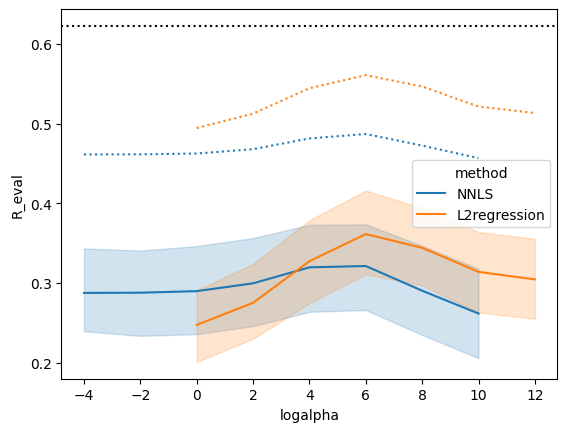

In [ ]:
sb.lineplot(data=df,y='R_eval',x='logalpha',hue='method')


<Axes: xlabel='logalpha', ylabel='R_norm'>

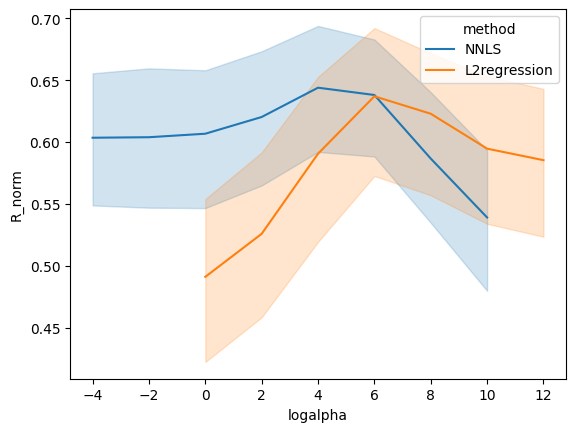

In [37]:
sb.lineplot(data=df,y='R_norm',x='logalpha',hue='method')


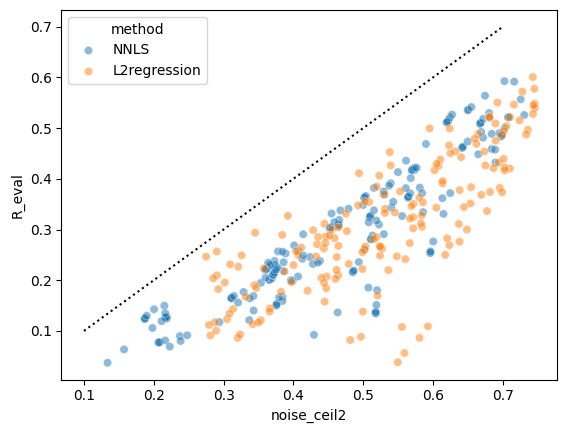

In [ ]:
# Check noise ceiling vs. R_eval

plt.plot([0.1,0.7],[0.1,0.7],'k:')